<a href="https://colab.research.google.com/github/pedroAndrad1/introducao_a_machine_learning/blob/master/introducao_ml_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Em vez de fazer algoritmos baseline na mão, a biblioteca sklearn já oferece esses estimadores. Os chamados dummy. Aqui também vamos ver um novo classificador que pode nos mostrar como ele está fazendo as decisões. Através de uma árvore de decisões.

Obs: Temos usado a accuracy_score do modulo metrics da biblioteca sklearn para calcular a acuracia dos modelos. Mas estes modelos já tem uma função que faz isso, a função score() que recebe por parâmetro, respectivamente, o x teste e o y teste.

#1 Primeiro vamos importar um dataset e fazer algumas modificações nele.

In [0]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

#Vou renomear as colunas do dataset

a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

#Agora vou trocar os valores de yes e no para 1 e 0

a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

#Vou também criar uma coluna nova para saber, a partir do modelo e o ano atual, a idade do carro

from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

#Vou converter os valores em milha para km e criar uma nova coluna chamada km_por_ano

dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

#Por fim, vou jogar fora as colunas que nao vou usar.
#A funcao drop, por padrao, so remove linhas. Entao, tenho que passar por parametro que estou trabalhando no axis = 1, eixo y

dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

#splitando o dataset

x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

import numpy as np
np.random.seed(0) #A propriedade random_state do train_test_split usa pra calcular o numero aleatorio o numpy. 

from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)



#2 Dummy classifier

Este funciona muito parecido com os outros estimadores, também vamos fazer um fit() e um predict(). É possível passar como parâmetro a estratégia que o dummy vai usar. Por default, o stratagie = stratify. Ou seja, a estratégia default é de chutar as classes de forma proporcional.

In [2]:
from sklearn.dummy import DummyClassifier

#Instanciando um dummy com a strategia stratify, que e o default entao nao preciso de parametros
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

#Instanciando um dummy com a estrategia most_frequent
dummy_mostfrequent = DummyClassifier(strategy = "most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia =  dummy_mostfrequent.score(teste_x, teste_y) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 51.28%
A acurácia do dummy mostfrequent foi 58.40%


#3 Decision tree e arvore de decisão (Sim, ficou redundante. Supere).

Aqui vamos usar a DecisionTreeClassifier do módulo tree da biblioteca sklearn.
O legal da DeciosionTree é que ela funciona bem com os dados crus, fora de uma mesma escala, e também nos oferece uma árvore de decisão que mostra como estão sendo feitas as escolhas.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelo = DecisionTreeClassifier(max_depth = 3) #O parametro max_dept e a altura maxima da arvore. Coloquei igual a 3 para poder ver a arvore bem no grafico
modelo.fit(treino_x, treino_y)
estimativas = modelo.predict(teste_x)

acuracia = accuracy_score(estimativas, teste_y) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 78.16%


#4 exportando e plotando a árvore de decisão

Aqui vamos usar o export_graphviz do módulo tree da biblioteca sklear para exportar as informações para montar o gráfico e vamos usar a biblioteca graphviz para, a partir dessas informações, montar a imagem do gráfico.

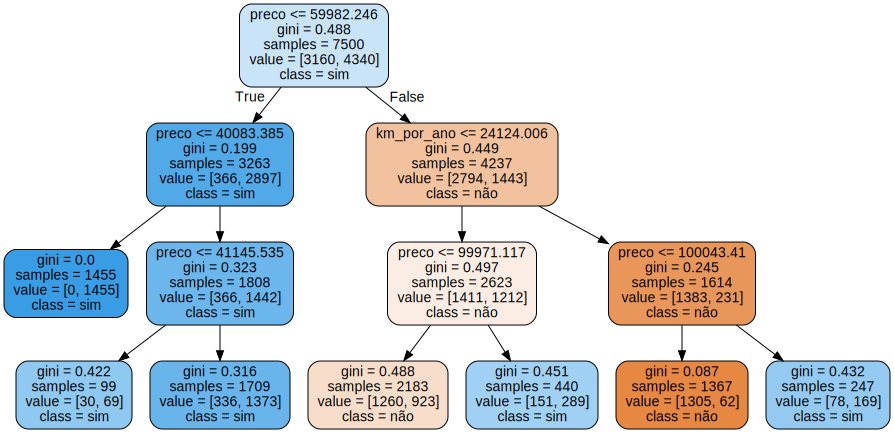

In [4]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns #Pegando o nome das colunas das features.
dot_data = export_graphviz(modelo, out_file=None,#Aqui passo a DecisionTree como parâmetro e digo que o gráfico não vai ser baixado.
                           filled = True, rounded = True, #Aqui coloco para a árvore ter cor, filled = true, e cada nó ser arredondo, rouded = true.
                           feature_names = features, #A propriedade features_names é o nome de cada atributo, feature, do dataset
                          class_names = ["não", "sim"]) #A propriedade class_names são os nomes das classes do dataset.
grafico = graphviz.Source(dot_data) #A funcao source monta uma arvore de decisao a partir das informacoes.
grafico